# <center>Random Forest Classifier with Grid Search
Random forest classifier is trained on feature set 2

## <font color='royalblue'>Get the data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from time import time
import pickle  
import sklearn
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

%store -r
%store

Stored variables and their in-db values:
X_16_val                  -> array([[ 0.10924883,  1.83030605, -0.14807631, ...
X_32_val                  -> array([[ 0.66944195,  0.46536115,  0.79919788, ...
X_32test_std              -> defaultdict(<class 'list'>, {0: array([[ 0.6694419
X_32train_std             -> array([[-0.74031227,  0.0126481 , -0.30967801, ...
X_test                    -> defaultdict(<class 'list'>, {0: array([[[ -6.40490
X_test_std                -> defaultdict(<class 'list'>, {0: array([[ 0.1092488
X_train                   -> array([[[ 0.00119031,  0.00873315,  0.00641749, ..
X_train_std               -> array([[-0.74031227,  0.0126481 , -0.30967801, ...
snrs                      -> [-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 
y_16_val                  -> array([6, 6, 5, ..., 0, 4, 1])
y_32_test                 -> defaultdict(<class 'list'>, {0: array([2, 2, 4, ..
y_32_train                -> array([0, 3, 4, ..., 0, 3, 1])
y_32_val                  -> array([2, 

In [2]:
print("Training data: ", X_32train_std.shape, "and labels: ", y_32_train.shape)
print(" ")
print("Test data:")
print("Total", len(X_32test_std), X_32test_std[18].shape, "arrays for SNR values:")
print(sorted(X_32test_std.keys()))

Training data:  (80000, 32) and labels:  (80000,)
 
Test data:
Total 20 (4000, 32) arrays for SNR values:
[-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18]


## <font color='royalblue'>Train and test the classifier

In [9]:
#Train the classifier

params = {'n_estimators': [200,230,250], 'max_depth': list(range(13,16)),'max_leaf_nodes': list(range(145, 150)), 
          'min_samples_split': [2,3,4], 'bootstrap': [True, False]}

grid_search_cv = GridSearchCV(RandomForestClassifier(random_state=42), params, verbose=1)

start = time()
grid_search_cv.fit(X_train_std, y_train)
print("Grid search took %.2f minutes "%((time() - start)//60))
print("   ")
print("Result of grid search, best estimator:")
print(grid_search_cv.best_estimator_)

Fitting 3 folds for each of 270 candidates, totalling 810 fits


[Parallel(n_jobs=1)]: Done 810 out of 810 | elapsed: 716.7min finished


Grid search took 717.00 minutes 
   
Result of grid search, best estimator:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=149,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=4, min_weight_fraction_leaf=0.0,
            n_estimators=230, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)


In [10]:
#Test the classifier

import collections

y_pred = defaultdict(list)
accuracy = defaultdict(list)

print("*Test the classfier:")
for snr in snrs:
    y_pred[snr] = grid_search_cv.predict(X_test_std[snr])
    accuracy[snr] = metrics.accuracy_score(y_test[snr], y_pred[snr])
    print("Random Forests's accuracy on %d dB SNR samples = "%(snr), accuracy[snr])   
    
accuracy = collections.OrderedDict(sorted(accuracy.items()))  #sort by ascending SNR value

*Test the classfier:
Random Forests's accuracy on -20 dB SNR samples =  0.12975
Random Forests's accuracy on -18 dB SNR samples =  0.12975
Random Forests's accuracy on -16 dB SNR samples =  0.1295
Random Forests's accuracy on -14 dB SNR samples =  0.1275
Random Forests's accuracy on -12 dB SNR samples =  0.154
Random Forests's accuracy on -10 dB SNR samples =  0.19975
Random Forests's accuracy on -8 dB SNR samples =  0.31825
Random Forests's accuracy on -6 dB SNR samples =  0.393
Random Forests's accuracy on -4 dB SNR samples =  0.3985
Random Forests's accuracy on -2 dB SNR samples =  0.39425
Random Forests's accuracy on 0 dB SNR samples =  0.46725
Random Forests's accuracy on 2 dB SNR samples =  0.61675
Random Forests's accuracy on 4 dB SNR samples =  0.80075
Random Forests's accuracy on 6 dB SNR samples =  0.8365
Random Forests's accuracy on 8 dB SNR samples =  0.83625
Random Forests's accuracy on 10 dB SNR samples =  0.84075
Random Forests's accuracy on 12 dB SNR samples =  0.83925


In [6]:
import collections

y_pred = defaultdict(list)
accuracy = defaultdict(list)

print("Test the classifier")
print(" ")
for snr in snrs:
    y_pred[snr] = grid_search_cv.predict(X_32test_std[snr])
    accuracy[snr] = metrics.accuracy_score(y_32_test[snr], y_pred[snr])
    print("Random Forests's Accuracy on %d dB SNR samples = "%(snr), accuracy[snr])   
    
accuracy = collections.OrderedDict(sorted(accuracy.items()))  #sort by ascending SNR value

Test the classifier
 
Random Forests's Accuracy on -20 dB SNR samples =  0.12975
Random Forests's Accuracy on -18 dB SNR samples =  0.12975
Random Forests's Accuracy on -16 dB SNR samples =  0.1295
Random Forests's Accuracy on -14 dB SNR samples =  0.1275
Random Forests's Accuracy on -12 dB SNR samples =  0.154
Random Forests's Accuracy on -10 dB SNR samples =  0.19975
Random Forests's Accuracy on -8 dB SNR samples =  0.31825
Random Forests's Accuracy on -6 dB SNR samples =  0.393
Random Forests's Accuracy on -4 dB SNR samples =  0.3985
Random Forests's Accuracy on -2 dB SNR samples =  0.39425
Random Forests's Accuracy on 0 dB SNR samples =  0.46725
Random Forests's Accuracy on 2 dB SNR samples =  0.61675
Random Forests's Accuracy on 4 dB SNR samples =  0.80075
Random Forests's Accuracy on 6 dB SNR samples =  0.8365
Random Forests's Accuracy on 8 dB SNR samples =  0.83625
Random Forests's Accuracy on 10 dB SNR samples =  0.84075
Random Forests's Accuracy on 12 dB SNR samples =  0.83925

## <font color='royalblue'> Visualize classifier performance

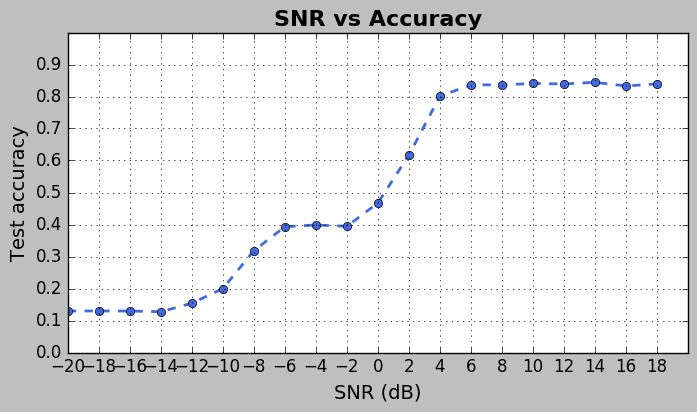

In [7]:
plt.style.use('classic')

fig = plt.figure(figsize=(8, 4), dpi=100)
x = snrs
y = list(accuracy.values())
plt.plot(x, y, marker="o", linewidth=2.0, linestyle='dashed', color='royalblue')
plt.axis([-20, 20, 0, 1])
plt.xticks(np.arange(min(x), max(x)+1, 2.0))
plt.yticks(np.arange(0, 1, 0.10))

ttl = plt.title('SNR vs Accuracy', fontsize=16)
ttl.set_weight('bold')
plt.xlabel('SNR (dB)', fontsize=14)
plt.ylabel('Test accuracy', fontsize=14)
plt.grid()

plt.show()

In [12]:
from sklearn.externals import joblib

joblib.dump(grid_search_cv, "random_forest2.1.pkl")

['random_forest2.1.pkl']

In [5]:
import pickle
from sklearn.externals import joblib
grid_search_cv = joblib.load("random_forest2.1.pkl")